![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
# Data-X: Introduction to Numpy

**Author:** Alexander Fred Ojala, Ikhlaq Sidhu, Lillian Dong

**License Agreement:** Feel free to do whatever you want with this code

___

# What is NumPy:  

NumPy stands for **Numerical Python** and it is the fundamental package for scientific computing in Python. It is a package that lets you efficiently store and manipulate numerical arrays. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities


# NumPy contains an array object that is "fast"


<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/threefundamental.png">


**It stores / consists of**:
* location of a memory block (allocated all at one time)
* a shape (3 x 3 or 1 x 9, etc)
* data type / size of each element

The core feauture that NumPy supports is its multi-dimensional arrays. In NumPy, dimensions are called axes and the number of axes is called a rank.

In [2]:
# written for Python 3.6
import numpy as np

In [3]:
np.__version__

'1.17.2'


## Creating a NumPy Array: - 
### 1. Simplest possible: We use a list as an argument input in making a NumPy Array


In [4]:
# Create array from Python list
list1 = [1, 2, 3, 4]
data = np.array(list1)
data

array([1, 2, 3, 4])

In [5]:
# Find out object type
type(data)

numpy.ndarray

In [6]:
# See data type that is stored in the array
data.dtype

dtype('int64')

In [7]:
# The data types are specified for the full array, if we store
# a float in an int array, the float will be up-casted to an int
data[0] = 3.14159
data

array([3, 2, 3, 4])

In [8]:
# NumPy converts to most logical data type
data2 = np.array([1.2, 2, 3, 4])
print(data2)
print(data2.dtype) # all values will be converted to floats

[1.2 2.  3.  4. ]
float64


In [9]:
# We can manually specify the datatype
data3 = np.array([1, 2, 3], dtype=str)
print(data3)
print(data3.dtype)

['1' '2' '3']
<U1


In [10]:
# lists can also be much longer
data = np.array(range(100000))
print(data)
print()
print(len(data)) # to see the length of the full array

[    0     1     2 ... 99997 99998 99999]

100000


In [11]:
#data = np.array(1,2,3,4, 5,6,7,8,9) # wrong
data = np.array([1,2,3,4,5,6,7,8,9]) # right
print(data)

[1 2 3 4 5 6 7 8 9]


In [12]:
# the elements of an array must be of a type that is valid to perform
# a specific mathematical operation on

data = np.array([1,2,'cat', 4])
print(data)
print(data.dtype)

['1' '2' 'cat' '4']
<U21


# Question: Resolve the datatype error

In [92]:
a = np.random.normal(0,1,1000)
b = np.arange(1000, dtype=np.uint8)
c = np.arange(1000, dtype=np.int16)
c += a + b

print(c)

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### More info on data types can be found here:
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

# Accessing elements: Slicing and indexing
<img src='https://www.learntowish.com/wp-content/uploads/2017/09/string-slicing.png' style='width:600px'>

In [14]:
# Similar to indexing and slicing Python lists:
data = np.array(range(10))
print(data[:])
print (data[0:3])
print (data[3:])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[3 4 5 6 7 8 9]


In [15]:
print (data[::-2])

[9 7 5 3 1]


In [16]:
# more slicing
x = np.array(range(18))
print ('x:',x)
print (x[5:15:2]) # [start : end : step_size]

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 5  7  9 11 13]


## Arrays are like lists, but different
NumPy utilizes efficient pointers to a location in memory and it will store the full array. Lists on the other hand are pointers to many different objects in memory.

In [17]:
# Slicing returns a view in Numpy, 
# and not a copy as is the case with Python lists
data = np.array(range(10))
view = data[0:3]
print(view)

[0 1 2]


In [18]:
l = list(range(10))
copy = l[0:3]
print(copy)

[0, 1, 2]


In [19]:
copy[0] = 99
view[0] = 99
print(copy)
print(view)

[99, 1, 2]
[99  1  2]


In [20]:
print('Python list:',l) # has not changed
print('NumPy array:',data) # has changed

Python list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
NumPy array: [99  1  2  3  4  5  6  7  8  9]


In [21]:
# Creating copies of the array instead of views
data = np.array(range(10))
arr_copy = data[:3].copy()
print('Array copy',arr_copy)

Array copy [0 1 2]


In [22]:
arr_copy[0] = 555
print('New array copy',arr_copy)
print('Original array',data) # now it is not a view any more

New array copy [555   1   2]
Original array [0 1 2 3 4 5 6 7 8 9]


In [23]:
# same thing with assignment, its not a copy, its the same data
x = np.array(range(20))
print (x)
y = x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [24]:
y[:] = 0

In [25]:
print (x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
x is y

True

In [27]:
x = [1,2]
y = [1,2]
x is y

False

Question - Making train and test sets: Create two arrays from array a, one with 2/3 and the other with 1/3 of the elements. 

Note that you don't want to mess up your original data set when you (later) make transformations on the train / test set.

In [28]:
a = np.arange(1000)
np.random.shuffle(a) # inplace

#input answer

# Arrays are also a lot faster than lists

In [29]:
# Arrays are faster and more efficient than lists
x = list(range(100000))

# Say that we want to square all elements
y = [i**2 for i in x]
print (y[0:10])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [30]:
# Time the operation with some IPython magic command
print('Time for Python lists:')
list_time = %timeit -o -n 20 [i**2 for i in x]

Time for Python lists:
42.6 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [31]:
z = np.array(x)
w = z**2
print(w[:10])

[ 0  1  4  9 16 25 36 49 64 81]


In [32]:
print('Time for NumPy arrays:')
np_time = %timeit -o -n 20 z**2

Time for NumPy arrays:
The slowest run took 8.16 times longer than the fastest. This could mean that an intermediate result is being cached.
213 µs ± 172 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [33]:
print('NumPy is ' + str(list_time.all_runs[0]//np_time.all_runs[0]) + \
      ' times faster than lists at squaring 100 000 elements.')

NumPy is 117.0 times faster than lists at squaring 100 000 elements.


# Universal functions
A function that is applied on an `ndarray` in an element-by-element fashion. Several universal functions can be found the NumPy documentation here:
https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html

In [34]:
# Arrays are different than lists in another way:
# x and y are lists

x = list(range(5))
y = list(range(5,10))
print ("list x = ", x)
print ("list y = ", y)

list x =  [0, 1, 2, 3, 4]
list y =  [5, 6, 7, 8, 9]


In [35]:
print ("x + y = ", x+y)

x + y =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
# now lets try with NumPy arrays:
xn = np.array(x)
yn = np.array(y)
print ('np.array xn =', xn)
print ('np.array xn =', yn)

np.array xn = [0 1 2 3 4]
np.array xn = [5 6 7 8 9]


In [37]:
print ("xn + yn = ", xn + yn)

xn + yn =  [ 5  7  9 11 13]


In [38]:
# + for np.arrays is a wrapper around the u. function np.add
np.add(xn,yn)

array([ 5,  7,  9, 11, 13])

In [39]:
# An array is a sequence that can be manipulated easily
# An arithmetic operation is applied to each element individually
# When two arrays are added, they must have the same size 
# (otherwise they might be broadcasted)

# python lists
print (3* x)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [40]:
# Numpy Arrays
print (3 * xn)

[ 0  3  6  9 12]


# Join, add, concatenate

In [41]:
print(xn)
print(yn)

[0 1 2 3 4]
[5 6 7 8 9]


In [42]:
# if you need to join numpy arrays, 
# try hstack, vstack, column_stack, or concatenate
np.hstack([xn, yn])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.vstack([xn, yn])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [44]:
np.column_stack([xn, yn])

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [45]:
np.concatenate([xn, yn], axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating arrays with 2 axis:


In [46]:
# This list has two dimensions
list3 = [[1, 2, 3],
         [4, 5, 6]]
list3 # nested list

[[1, 2, 3], [4, 5, 6]]

In [47]:
# data = np.array([[1, 2, 3], [4, 5, 6]])
data = np.array(list3)
data

array([[1, 2, 3],
       [4, 5, 6]])

### Attributes of a multidim array

In [48]:
print('Dimensions:',data.ndim)
print ('Shape:',data.shape)
print('Size:', data.size)

Dimensions: 2
Shape: (2, 3)
Size: 6


In [49]:
# You can also transpose an array Matrix with either np.transpose(arr)
# or arr.T
data.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [50]:
np.transpose(data)

array([[1, 4],
       [2, 5],
       [3, 6]])

# Other ways to create NumPy arrays

In [51]:
# np.arange() is similar to built in range()
# Creates array with a range of consecutive numbers
# starts at 0 and step=1 if not specified. Exclusive of stop.

print(np.arange(12))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [52]:
#Array increasing from start to end: np.arange(start, end)
print(np.arange(10, 20))

[10 11 12 13 14 15 16 17 18 19]


In [53]:
# Array increasing from start to end by step: np.arange(start, end, step)
# The range always includes start but excludes end
print(np.arange(1, 10, 2))

[1 3 5 7 9]


In [54]:
# Returns a new array of specified size, filled with zeros.
print(np.zeros((2,5), dtype=np.int8))

[[0 0 0 0 0]
 [0 0 0 0 0]]


In [55]:
#Returns a new array of specified size, filled with ones.
print(np.ones((4,2), dtype=np.float128))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [56]:
# Returns the identity matrix of specific squared size
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Some useful indexing strategies

### There are two main types of indexing: Integer and Boolean

In [57]:
x = np.array([[1, 2], [3, 4], [5, 6]]) 
print(x)

[[1 2]
 [3 4]
 [5 6]]


In [58]:
## Integer indexing
# first element is  the row, 2nd element is the column
print(x[1,0])

3


In [59]:
print(x[1:,:]) # all rows after first, all columns

[[3 4]
 [5 6]]


In [60]:
# first list contains  row indices, 2nd element contains column indices
res = x[[0,1,2], [0,1,1]]  # create index object
print (res)

[1 4 6]


In [61]:
## Boolean indexing
print('Comparison operator, find all values greater than 3:\n')
print(x>3)

Comparison operator, find all values greater than 3:

[[False False]
 [False  True]
 [ True  True]]


In [62]:
print('Boolean indexing, only extract elements greater than 3:\n')
print(x[x>3])

Boolean indexing, only extract elements greater than 3:

[4 5 6]


### Masks

In [63]:
arr = np.arange(10)
mask = arr>5
print(mask)

[False False False False False False  True  True  True  True]


In [64]:
print(arr[mask])

[6 7 8 9]


In [65]:
# Functions any / all
np.any( arr==9 )

True

In [66]:
np.all( arr>-1 )

True

## Extra NumPy array methods

In [71]:
# Reshape is used to change the shape
a = np.arange(0, 15)

In [72]:
print('Original:',a)
a = a.reshape(3, 5)
# a = np.arange(0, 15).reshape(3, 5)  # same thing
print ('Reshaped:')
print(a)

Original: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Reshaped:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [73]:
# We can also flatten matrices using ravel()
x = np.array(range(24))
x = x.reshape(4,6)
print('Original:\n',x)
print()
x = x.ravel() # make it flat
print ('Flattened:\n',x)

Original:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

Flattened:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [74]:
# We can also easily find the sum, min, max, .. are easy
print (a)
print()
print ('Sum:',a.sum())
print('Min:', a.min())
print('Max:', a.max())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Sum: 105
Min: 0
Max: 14


In [75]:
print ('Column sum:',a.sum(axis=0))
print ('Row sum:',a.sum(axis=1))

# Note here axis specifies what dimension to "collapse"

Column sum: [15 18 21 24 27]
Row sum: [10 35 60]


In [76]:
# To get the cumulative product:
print (np.arange(1, 10))
print (np.cumprod(np.arange(1, 10)))

[1 2 3 4 5 6 7 8 9]
[     1      2      6     24    120    720   5040  40320 362880]


In [77]:
# To get the cumulative sum:
print (np.arange(1, 10))
print(np.cumsum((np.arange(1, 10))))

[1 2 3 4 5 6 7 8 9]
[ 1  3  6 10 15 21 28 36 45]


In [78]:
# Creating a 3D array:
a = np.arange(0, 96).reshape(2, 6, 8)
print(a)

[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]
  [16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]
  [32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]

 [[48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]
  [64 65 66 67 68 69 70 71]
  [72 73 74 75 76 77 78 79]
  [80 81 82 83 84 85 86 87]
  [88 89 90 91 92 93 94 95]]]


In [79]:
# The same methods typically apply in multiple dimensions
print (a.sum(axis = 0))
print ('---')
print (a.sum(axis = 1))

[[ 48  50  52  54  56  58  60  62]
 [ 64  66  68  70  72  74  76  78]
 [ 80  82  84  86  88  90  92  94]
 [ 96  98 100 102 104 106 108 110]
 [112 114 116 118 120 122 124 126]
 [128 130 132 134 136 138 140 142]]
---
[[120 126 132 138 144 150 156 162]
 [408 414 420 426 432 438 444 450]]


## Arrray Axis
<img src= "https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/anatomyarray.png">



---
# More ufuncs and Basic Operations

One of the coolest parts of NumPy is the ability for you to run mathematical operations on top of arrays. Here are some basic operations:

In [80]:
a = np.arange(11, 21)
b = np.arange(0, 10)
print ("a = ",a)
print ("b = ",b)

a =  [11 12 13 14 15 16 17 18 19 20]
b =  [0 1 2 3 4 5 6 7 8 9]


In [81]:
print (a + b)
print (a * b) # Hadamard product
print (a ** 2)

[11 13 15 17 19 21 23 25 27 29]
[  0  12  26  42  60  80 102 126 152 180]
[121 144 169 196 225 256 289 324 361 400]


In [82]:
print ('You can even do things like matrix operations')
print (a.dot(b))

You can even do things like matrix operations
780


In [83]:
print ('Matrix multiplication')
c = np.arange(1,5).reshape(2,2)
print ("c = \n", c)
print()
d = np.arange(5,9).reshape(2,2)
print ("d = \n", d)
print()
print (np.matmul(d,c))

Matrix multiplication
c = 
 [[1 2]
 [3 4]]

d = 
 [[5 6]
 [7 8]]

[[23 34]
 [31 46]]


Question: Ax = b. Solve for x. Note, you should use numpy's pseudoinverse function while aligning A and b's dimensions. 

In [84]:
A = np.array([[1, 2, 3, 4, 5, 6]]).reshape(3,2)
b = np.array([7,8,9]).reshape(3,-1)
print(A)
print()
print(b)

# input answer
# print(x)

[[1 2]
 [3 4]
 [5 6]]

[[7]
 [8]
 [9]]


# Random numbers

In [85]:
# Radom numbers
np.random.seed(0)  # set the seed to zero for reproducibility
print(np.random.uniform(1,5,10))   # 10 random uniform numbers 1 to 5

[3.19525402 3.86075747 3.4110535  3.17953273 2.6946192  3.58357645
 2.75034885 4.567092   4.85465104 2.53376608]


In [86]:
print (np.random.exponential(1,5)) # 5 random exp numbers with rate 1
print (np.random.random(8).reshape(2,4)) #8 random 0-1, 2 x 4 array

[1.56889614 0.75267411 0.83943285 2.59825415 0.07368535]
[[0.0871293  0.0202184  0.83261985 0.77815675]
 [0.87001215 0.97861834 0.79915856 0.46147936]]


Question: Create a 10x10 matrix from a 100-dimensional vector with values drawn from the normal distribution of mean = 0, stdev = 1.

In [87]:
#input answer

# Trignometric functions

In [162]:
# linspace: Create an array of numbers from a to b 
# with n equally spaced numbers (inclusive)

data = np.linspace(0,10,5)
print (data)

[ 0.   2.5  5.   7.5 10. ]


In [163]:
x = np.linspace(0,np.pi, 3)
print('x = ', x)
print()
print ("sin(x) = ", np.sin(x))

x =  [0.         1.57079633 3.14159265]

sin(x) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [164]:
x = np.linspace(0,4*np.pi,1000)
y = np.sin(x)-np.cos(x)**2

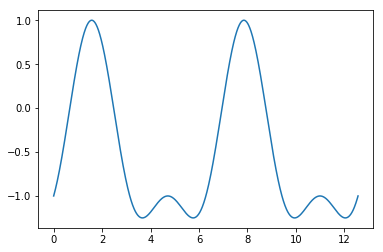

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)

# Prediction Example (Ordinary Least Square)

In [166]:
# Generate data w linear trend
x = np.linspace(0,10,50)
Y = 5 + x*2 + np.random.normal(0,2.5,len(x))

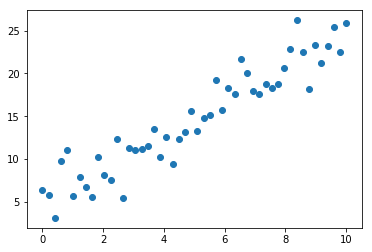

In [167]:
plt.scatter(x,Y);

In [168]:
X = np.column_stack([np.ones(len(x)),x])

In [169]:
X[:4,:]

array([[1.        , 0.        ],
       [1.        , 0.20408163],
       [1.        , 0.40816327],
       [1.        , 0.6122449 ]])

Remeber:
$Y \in R^{50x1}, X \in R^{50x2}, W \in R^{2x1}$
$$\hat{Y} = XW$$
$$ SE = (Y-XW)^2$$
$$ \nabla_W SE = 2X^T(Y-XW) = 0$$
$$W_{ols} = (X^TX)^{-1}X^TY$$

In [ ]:
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [ ]:
W

In [ ]:
plt.scatter(x,Y);
plt.plot(x,W[0]+W[1]*x,c='red');

# Attendance Exercises

## Question 1: 
### Given 2 matrices C & D:

In [97]:
C = np.array([1, 5, 7, 8, 9, 11])
D = np.array([30, 60, 80, 19, 6, 4]).reshape(3, 2)

### Square each entry of C, then reshape C to be a 2x3 matrix. Multiply the new C & D: what is the sum of the elements in the last column of the product? Submit on bCourses

See bCourses for questions 2 & 3

## Question 4:
### Given 2 numpy arrays, E & F:

In [130]:
# DO NOT change this code
import pandas as pd
storage = pd.read_csv('storage.csv')
E = storage['a'].values
F = storage['b'].values

print('E: \n', E)
print('\n')
print('F: \n', F)

E: 
 [ 0.18759    -3.06735841 -6.01524185 -6.00493059  4.97719169  2.55905319
  8.64114082 -1.5799068   2.73134519 -0.62920848 -0.52124254  7.08174751
 -0.91394513  8.56333601  2.41014514 -8.29151414 -8.64034168  9.64628425
 -2.01281228  1.74917664 -1.36827861 -6.82207123 -7.48896594 -5.74607695
  2.10675622  0.93067175 -3.42823135 -9.11651521 -3.519439   -2.03393353
  5.12847566  4.74967979 -5.57183807 -5.44652096  2.55765655  3.03552695
  1.22205552 -7.76057239 -4.28559703 -9.36593577]


F: 
 [ 2.30753712 -0.94741128 -3.89529472 -3.88498346  7.09713882  4.67900032
 10.76108795  0.54004032  4.85129231  1.49073864  1.59870458  9.20169464
  1.206002   10.68328314  4.53009227 -6.17156701 -6.52039455 11.76623137
  0.10713485  3.86912376  0.75166852 -4.7021241  -5.36901881 -3.62612982
  4.22670335  3.05061887 -1.30828423 -6.99656808 -1.39949187  0.0860136
  7.24842278  6.86962692 -3.45189094 -3.32657383  4.67760367  5.15547407
  3.34200265 -5.64062527 -2.16564991 -7.24598865]


### What is the covariance of E & F? See lecture for how to calculate: https://github.com/ikhlaqsidhu/data-x/blob/master/02-theory-linear-regression/prediction-linear-regression.pdf
#### Round to the nearest decimal point (ex: 5.41 -> 5.4)
*Submit your answer on bCourses*